In [29]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
arr = [1, 2, 3, 4, 5]
nparr = np.array(arr)
nparr2 = np.array([1, 2, 3, 4, 5])
print(nparr)
print(nparr2)

[1 2 3 4 5]
[1 2 3 4 5]


In [8]:
nparr3 = np.array([nparr, nparr2])
print(nparr3)
r, c = np.shape(nparr3)
print(r, c)
for i in range(r):
  for j in range(c):
    print(nparr3[i][j])

[[1 2 3 4 5]
 [1 2 3 4 5]]
2 5
1
2
3
4
5
1
2
3
4
5


In [19]:
x_train = torch.FloatTensor([1, 2, 3])
y_train = torch.FloatTensor([2, 4, 6])

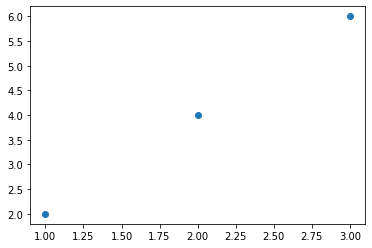

In [20]:
plt.scatter(x_train, y_train)  # plt.plot()

In [21]:
x = np.linspace(0, 10, 11)
y = np.linspace(0, 10, 11)

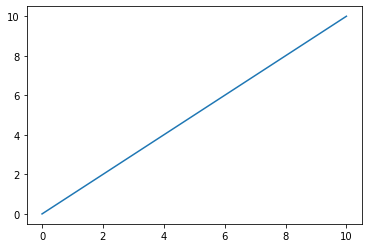

In [22]:
plt.plot(x, y)

In [26]:
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [35]:
hypothesis = x_train * W + b
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [36]:
optimizer = optim.SGD([W, b], lr = 0.01)

In [37]:
optimizer.zero_grad()  # gradient 초기화
cost.backward()  # cost의 기울기 계산
optimizer.step()  # W와 b 업데이트

In [39]:
num_epochs = 1000
for epoch in range(num_epochs):
  hypothesis = x_train * W + b
  cost = torch.mean((hypothesis - y_train) ** 2)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch{:4d} / {} W: {:3f}, b: {:3f}, cost: {:6f}'.format(epoch, num_epochs, W.item(), b.item(), cost.item()))

Epoch   0 / 1000 W: 0.500421, b: 0.213806, cost: 11.691541
Epoch 100 / 1000 W: 1.746915, b: 0.575297, cost: 0.047709
Epoch 200 / 1000 W: 1.801059, b: 0.452239, cost: 0.029481
Epoch 300 / 1000 W: 1.843614, b: 0.355501, cost: 0.018218
Epoch 400 / 1000 W: 1.877066, b: 0.279457, cost: 0.011257
Epoch 500 / 1000 W: 1.903363, b: 0.219678, cost: 0.006956
Epoch 600 / 1000 W: 1.924035, b: 0.172687, cost: 0.004299
Epoch 700 / 1000 W: 1.940285, b: 0.135747, cost: 0.002656
Epoch 800 / 1000 W: 1.953058, b: 0.106710, cost: 0.001641
Epoch 900 / 1000 W: 1.963099, b: 0.083884, cost: 0.001014


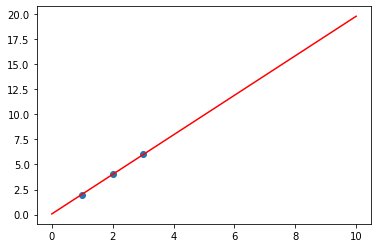

In [45]:
W2 = W.detach().numpy()
b2 = b.detach().numpy()
plt.plot(x, x * W2 + b2, 'r')
plt.scatter(x_train, y_train)